In [11]:
#Load Packages
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

In [12]:
#Import csv file and create data frame
#df = pd.read_csv(Path('..Resources/SP500&Gas.csv'))
#pd.read_csv('SP500 & Gas',encoding = "utf-8")
#kwds.update(kwds_defaults)
#return _read(r"C:\Users\lmeji\Desktop\Project_branch\Investing_Analysis\Resources\SP500&Gas.csv", kwds)
data = Path(r"C:\Users\lmeji\Desktop\Project_branch\Investing_Analysis\Resources\SP500&Gas_updated.csv")
data_df = pd.read_csv(data)
data_df.head()

,Week,Gasoline_stock_price,GSPC_Open,GSPC_High,GSPC_Low,GSPC_Close,GSPC_Volume,GSPC_Adjusted,Gas_Price
0,44781,215674,4155.93,4186.62,4128.97,4140.06,3604650000,4140.06,4.038
1,44774,220316,4112.38,4144.95,4096.02,4118.63,3540960000,4118.63,4.192
2,44767,225294,3965.72,3975.30,3943.46,3966.84,2988650000,3966.84,4.330
3,44760,225131,3883.79,3902.44,3818.63,3830.85,3414470000,3830.85,4.490
4,44753,228435,3880.94,3880.94,3847.22,3854.43,3023830000,3854.43,4.646


In [ ]:
#parser = TextFileReader("C:\\Users\\lmeji\\Desktop\\Project_branch\\Investing_Analysis\\Resources\\SP500 & Gas.csv"

In [13]:
#Double check the data shape
#this is help to understand if we are dealing with a long (more rows than columns) or wide set (more columns than rows)

print(data_df.shape)

(1068, 9)


In [56]:
#import math
#from math import trunc

#num = ('GSPC_Open','GSPC_High','GSPC_Low','GSPC_Close','GSPC_Volume','GSPC_Adjusted','Gas_Price')
#df['GSPC_Open'] = df['GSPC_Open'].astype(int)


In [14]:
#Check out the data types: this could reveal additonal conversions that might need to happen 

data_df.dtypes

Week                      int64
Gasoline_stock_price      int64
GSPC_Open               float64
GSPC_High               float64
GSPC_Low                float64
GSPC_Close              float64
GSPC_Volume               int64
GSPC_Adjusted           float64
Gas_Price               float64
dtype: object

In [15]:
#Remove rows that have at least 1 null value.

new_data = data_df.dropna()

#Check the dataset shape and head to make sure the nulls were removed

print(new_data.shape)

new_data.head()

(1068, 9)


,Week,Gasoline_stock_price,GSPC_Open,GSPC_High,GSPC_Low,GSPC_Close,GSPC_Volume,GSPC_Adjusted,Gas_Price
0,44781,215674,4155.93,4186.62,4128.97,4140.06,3604650000,4140.06,4.038
1,44774,220316,4112.38,4144.95,4096.02,4118.63,3540960000,4118.63,4.192
2,44767,225294,3965.72,3975.30,3943.46,3966.84,2988650000,3966.84,4.330
3,44760,225131,3883.79,3902.44,3818.63,3830.85,3414470000,3830.85,4.490
4,44753,228435,3880.94,3880.94,3847.22,3854.43,3023830000,3854.43,4.646


In [16]:
new_data.head(20)

,Week,Gasoline_stock_price,GSPC_Open,GSPC_High,GSPC_Low,GSPC_Close,GSPC_Volume,GSPC_Adjusted,Gas_Price
0,44781,215674,4155.93,4186.62,4128.97,4140.06,3604650000,4140.06,4.038
1,44774,220316,4112.38,4144.95,4096.02,4118.63,3540960000,4118.63,4.192
2,44767,225294,3965.72,3975.30,3943.46,3966.84,2988650000,3966.84,4.330
3,44760,225131,3883.79,3902.44,3818.63,3830.85,3414470000,3830.85,4.490
4,44753,228435,3880.94,3880.94,3847.22,3854.43,3023830000,3854.43,4.646
5,44739,219112,3920.76,3927.72,3889.66,3900.11,3385120000,3900.11,4.872
6,44725,218963,3838.15,3838.15,3734.30,3749.63,4572820000,3749.63,5.006
7,44718,217474,4134.72,4168.78,4109.18,4121.43,3852050000,4121.43,4.876
8,44704,218996,3919.42,3981.88,3909.04,3973.75,3392770000,3973.75,4.593
9,44697,219707,4013.02,4046.46,3983.99,4008.01,3824320000,4008.01,4.491


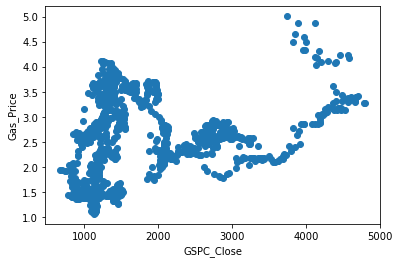

In [19]:
plt.scatter(new_data.GSPC_Close, new_data.Gas_Price)
plt.xlabel('GSPC_Close')
plt.ylabel('Gas_Price')
plt.show()

In [37]:
# The data in the df column must be reshaped into an array with shape (num_samples, num_features)
# https://stackoverflow.com/questions/18691084/what-does-1-mean-in-numpy-reshape
X = new_data.GSPC_Close.values.reshape(-1, 1)

In [38]:
X[:5]

array([[4140.06],
       [4118.63],
       [3966.84],
       [3830.85],
       [3854.43]])

In [39]:
# The shape of X with 1068 samples and a single feature (column)
X.shape

(1068, 1)

In [40]:
y = new_data.Gas_Price

In [41]:
# Create a model with scikit-learn
#Perform linear regression with 9 columns
model = LinearRegression()

In [42]:
# Fit the data into the model
# By convention, X is capitalized and y is lowercase
model.fit(X, y)

LinearRegression()

In [43]:
# The model creates predicted y values based on X values
y_pred = model.predict(X)
print(y_pred.shape)

(1068,)


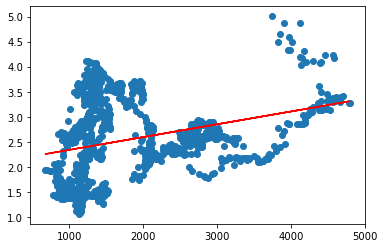

In [44]:
# Plot the results. The best fit line is red.
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [45]:
#The slope indicates the steepness of a line and the intercept indicates the location where it intersects an axis.
#The slope and the intercept define the linear relationship between two variables, and can be used to estimate an average rate of change.
#The greater the magnitude of the slope, the steeper the line and the greater the rate of change which means one variable is dependent of the other. 
#Examining the specific parementers of our model
# The slope
# The y-intercept
print(model.coef_)
print(model.intercept_)

[0.00025558]
2.0820572529674304
